<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_52_cats_and_dogs_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고양이 강아지 구분
## CNN 이용
- 원래 데이터는 25,000개 (고양이 + 강아지)
- 여기서는 2000개로 학습을 시킨다
- 검증은 1000개의 이미지 사용 

## 데이터 다운로드

In [1]:
import os, os.path, shutil
# import zipfile
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
!curl -L \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -o ./cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1 65.4M    1 1054k    0     0  1054k      0  0:01:03  0:00:01  0:01:02  937k
 13 65.4M   13 8830k    0     0  4415k      0  0:00:15  0:00:02  0:00:13 4155k
 23 65.4M   23 15.2M    0     0  5194k      0  0:00:12  0:00:03  0:00:09 4986k
 32 65.4M   32 21.3M    0     0  5463k      0  0:00:12  0:00:04  0:00:08 5298k
 41 65.4M   41 27.0M    0     0  5532k      0  0:00:12  0:00:05  0:00:07 5532k
 52 65.4M   52 34.1M    0     0  5831k      0  0:00:11  0:00:06  0:00:05 6787k
 62 65.4M   62 41.0M    0     0  6002k      0  0:00:11  0:00:07  0:00:04 6636k
 74 65.4M   74 48.7M    0     0  6237k      0  0:00:10  0:00:08  0:00:02 6864k
 85 65.4M   85 56.1M    0     0  6387k      0  0:00

In [7]:
# !unzip -q cats_and_dogs_filtered.zip

In [5]:
# !apt-get install tree
!pip install tree

  Stored in directory: C:\Users\rta_note\AppData\Local\pip\Cache\wheels\c7\08\aa\42261411808c634cd1d0e9fe6cde5e78bf47c2c8028f3930af
Successfully built tree


In [8]:
# !tree -d .

In [2]:
base_dir = './cats_and_dogs_filtered/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
train_cats_dir

'./cats_and_dogs_filtered/cats_and_dogs_filtered\\train\\cats'

## 파일 확인

In [4]:
# os.listdir(train_dogs_dir)[:10]

In [5]:
train_cat_fnames = os.listdir(train_cats_dir)
print (train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print (train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [6]:
print ('total training cat images:', len(os.listdir(train_cats_dir)))
print ('total training dog images:', len(os.listdir(train_dogs_dir)))
print ('total validation cat images:', len(os.listdir(validation_cats_dir)))
print ('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


## 이미지 샘플 확인

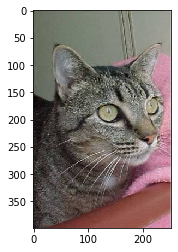

In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
img_path = os.path.join(train_cats_dir, train_cat_fnames[7]) 
img = mpimg.imread(img_path)
plt.imshow(img)

In [14]:
type(img), img.shape, img[0,0,:]

(numpy.ndarray, (399, 253, 3), array([171, 179, 158], dtype=uint8))

## 간단한 CNN을 사용한 모델


In [15]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 

Using TensorFlow backend.
C:\Users\rta_note\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rta_note\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rta_note\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rta_note\Anaconda3\lib\site-packages\tensorflow\python\framewo

#### ImageDataGenerator() object
- Generate batches of tensor image data with real-time data augmentation. The data 
  will be looped over (in batches).
- flow_from_dataframe() method: Takes the dataframe and the path to a directory and 
    generates batches of augmented/normalized data.
- flow_from_directory() method: Takes the path to a directory & generates batches of 
    augmented data.

In [17]:
img_width = 150
img_height = 150

datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_directory(directory=train_dir,
											   target_size=(img_width,img_height),
											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=20)

validation_generator = datagen.flow_from_directory(directory=validation_dir,
											   target_size=(img_width,img_height),
											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=20)

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', 
                        input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (

In [20]:
# for exercise (just for checking) - it will loop forever, so you need break !
for data_batch, labels_batch in train_generator:
    print(data_batch.shape, labels_batch.shape)
    break

(20, 150, 150, 3) (20,)


In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 128s 1s/step - loss: 0.4560 - acc: 0.7860 - val_loss: 0.5743 - val_acc: 0.7300
Epoch 2/30
100/100 [==============================] - 128s 1s/step - loss: 0.4288 - acc: 0.8015 - val_loss: 0.4604 - val_acc: 0.7340
Epoch 3/30
100/100 [==============================] - 130s 1s/step - loss: 0.4003 - acc: 0.8195 - val_loss: 0.4106 - val_acc: 0.7330
Epoch 4/30
100/100 [==============================] - 123s 1s/step - loss: 0.3721 - acc: 0.8410 - val_loss: 0.3956 - val_acc: 0.7270
Epoch 5/30
100/100 [==============================] - 125s 1s/step - loss: 0.3619 - acc: 0.8340 - val_loss: 0.7231 - val_acc: 0.7360
Epoch 6/30
100/100 [==============================] - 130s 1s/step - loss: 0.3375 - acc: 0.8515 - val_loss: 0.6306 - val_acc: 0.7490
Epoch 7/30
100/100 [==============================] - 127s 1s/step - loss: 0.3139 - acc: 0.8600 - val_loss: 0.5464 - val_acc: 0.7410
Epoch 8/30
100/100 [==============================] - 125s 1s/step - 

KeyboardInterrupt: 

### when to use .fit and .fit_genertor ?
- model.fit is used when the entire training dataset can fit into the memory and no data 
augmentation is applied. 
- model.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.
"""

#### When we call the .fit() function it makes assumptions:

- The entire training set can fit into the Random Access Memory (RAM) of the computer.
- Calling the model .fit method for a second time is not going to reinitialize our 
  already trained weights, which means we can actually make consecutive calls to fit 
  if we want to and then manage it properly.
- There is no need for using the Keras generators(i.e no data argumentation)
- Raw data is itself used for training our network and our raw data will only fit 
  into the memory.

#### When we call the .fit_generator() function it makes assumptions:

- (As the name suggests, the .fit_generator  function assumes there is an underlying 
   function that is generating the data for it.)
- Keras is first calling the generator function(dataAugmentaion)
- Generator function(dataAugmentaion) provides a batch_size of 32 to our 
  .fit_generator() function.
- our .fit_generator() function first accepts a batch of the dataset, then performs 
  backpropagation on it, and then updates the weights in our model.
- For the number of epochs specified(10 in our case) the process is repeated.
- returns a History object. Its History.history attribute is a record of training 
  loss values and metrics values at successive epochs, as well as validation loss 
  values and validation metrics values (if applicable).

## 성능 확인

Text(0.5,1,'Training(--) and validation loss')

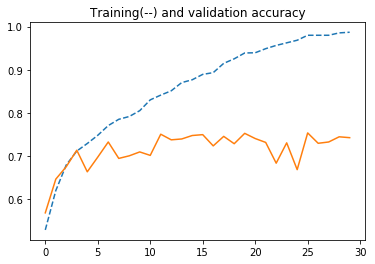

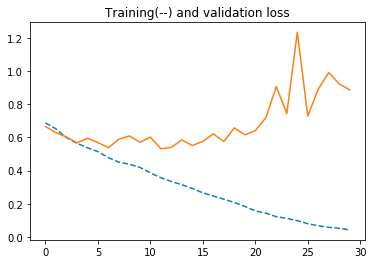

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.figure()
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')


### 과대적합이 발생한 것을 알 수 있다.

# data augmentation과 드롭아웃 사용

In [ ]:
train_datagen = ImageDataGenerator(
  rescale= 1./255,
  rotation_range = 40,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
											   target_size=(img_width,img_height),
# 											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=32)

validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
											   target_size=(img_width,img_height),
# 											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=32)


model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', 
                        input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### augmented 된 훈련 이미지는 마지막 셀에서 보세요...^^

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 27s 271ms/step - loss: 0.6890 - acc: 0.5272 - val_loss: 0.6684 - val_acc: 0.5508
Epoch 2/100
100/100 [==============================] - 24s 243ms/step - loss: 0.6708 - acc: 0.5744 - val_loss: 0.6408 - val_acc: 0.6463
Epoch 3/100
100/100 [==============================] - 24s 244ms/step - loss: 0.6564 - acc: 0.6100 - val_loss: 0.6626 - val_acc: 0.5635
Epoch 4/100
100/100 [==============================] - 24s 240ms/step - loss: 0.6345 - acc: 0.6394 - val_loss: 0.6048 - val_acc: 0.6727
Epoch 5/100
100/100 [==============================] - 24s 239ms/step - loss: 0.6178 - acc: 0.6537 - val_loss: 0.6374 - val_acc: 0.6390
Epoch 6/100
100/100 [==============================] - 24s 239ms/step - loss: 0.6067 - acc: 0.6684 - val_loss: 0.5693 - val_acc: 0.7004
Epoch 7/100
100/100 [==============================] - 24s 239ms/step - loss: 0.5867 - acc: 0.6878 - val_loss: 0.5612 - val_acc: 0.6999
Epoch 8/100
100/100 [===========================

Text(0.5,1,'Training(--) and validation loss')

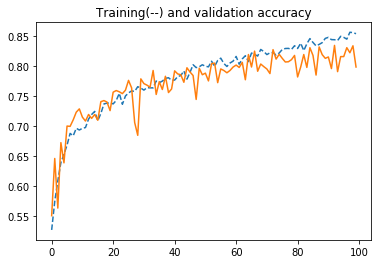

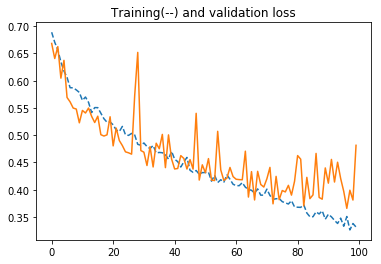

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.figure()
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

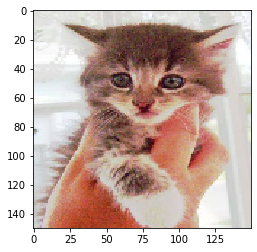

In [40]:
# Random 하게 데이터 증식한 훈련 이미지 그리기 (from the Keras book)

train_datagen = ImageDataGenerator(
  rescale= 1./255,
  rotation_range = 40,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip = True)


from keras.preprocessing import image   # 이밎 전처리 유틸리티 모듈

fnames = sorted([os.path.join(train_cats_dir, fname) for 
                fname in os.listdir(train_cats_dir)])
img_path = fnames[3]  # 증식할 이미지 선택
img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)    # (1,150,150,30) 크기로 변환

plt.imshow(img)

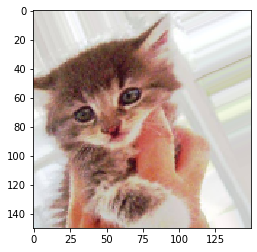

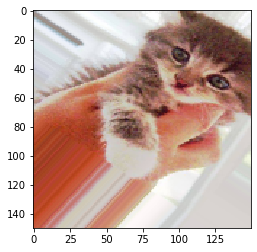

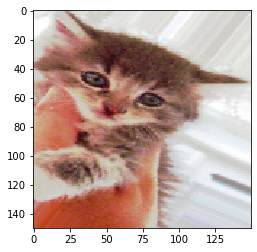

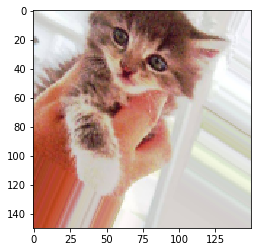

In [42]:
# ImageDataGen.flow(): Takes data & label arrays, generates batches of augmented data.
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i % 4 == 0:
        break
plt.show()